In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images.shape[1:]

(28, 28)

In [7]:
train_images = train_images.reshape([-1, 28, 28, 1])
test_images = test_images.reshape([-1, 28, 28, 1])

In [8]:
train_images.shape

(60000, 28, 28, 1)

# CNN 모델구성

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), data_format='channels_last', padding="SAME", activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="SAME"),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.Dropout(0.25)
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
tracking = model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 367us/sample - loss: 2.1488 - accuracy: 0.6452
Epoch 2/5
60000/60000 [==============================] - 30s 499us/sample - loss: 1.6849 - accuracy: 0.6817- l - ETA: 0s - loss: 1.6878 - accuracy - ETA: 0s - loss: 1
Epoch 3/5
60000/60000 [==============================] - 54s 892us/sample - loss: 1.5355 - accuracy: 0.6919
Epoch 4/5
60000/60000 [==============================] - 24s 394us/sample - loss: 1.4399 - accuracy: 0.6962
Epoch 5/5
60000/60000 [==============================] - 22s 363us/sample - loss: 1.3522 - accuracy: 0.7032


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

# 정확도 평가

In [27]:
(test_loss, test_acc) = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 1s - loss: 0.7240 - accuracy: 0.9010

테스트 정확도: 0.901


In [28]:
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc=0)

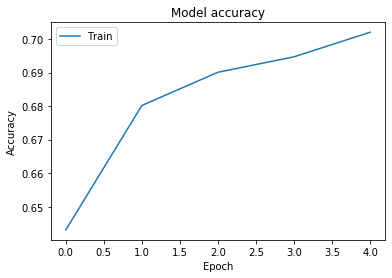

In [29]:
plt_show_acc(tracking)